<a href="https://colab.research.google.com/github/puttipongyy/BSC_DPDM23/blob/main/test_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
survey = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/Project_data/dataset_consumer-insight-survey2019.xlsx')


# column ที่ใช้ Association
ช่วงเวลา k 1-10  
ประเภทข่าวที่สนใจ 5 อันดับ ที่พูดขึ้นมาเอง r1 - rr1

In [4]:
survey_association = survey.copy()

In [5]:
survey_association = survey_association[['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'r1', 'r2', 'r3', 'r4', 'r5','rr1']]

In [6]:
survey_association['r2'] = survey_association['r2'].replace({21: 99, 80: 99})
survey_association['r3'] = survey_association['r3'].replace({31: 99})

In [7]:
survey_association['k1'] = survey_association['k1'].replace({0: 99, 1: 'time01'})
survey_association['k2'] = survey_association['k2'].replace({0: 99, 1: 'time02'})
survey_association['k3'] = survey_association['k3'].replace({0: 99, 1: 'time03'})
survey_association['k4'] = survey_association['k4'].replace({0: 99, 1: 'time04'})
survey_association['k5'] = survey_association['k5'].replace({0: 99, 1: 'time05'})
survey_association['k6'] = survey_association['k6'].replace({0: 99, 1: 'time06'})
survey_association['k7'] = survey_association['k7'].replace({0: 99, 1: 'time07'})
survey_association['k8'] = survey_association['k8'].replace({0: 99, 1: 'time08'})
survey_association['k9'] = survey_association['k9'].replace({0: 99, 1: 'time09'})
survey_association['k10'] = survey_association['k10'].replace({0: 99, 1: 'time10'})

In [8]:
# Change data type of multiple columns to string using applymap()
# survey_association[['r1', 'r2', 'r3', 'r4', 'r5','rr1']] = survey_association[['r1', 'r2', 'r3', 'r4', 'r5','rr1']].applymap(str)

# print(survey_association[['r1', 'r2', 'r3', 'r4', 'r5','rr1']])


In [9]:
survey_association['new_column'] = survey_association[['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'r1', 'r2', 'r3', 'r4', 'r5','rr1']].apply(list, axis=1)

In [10]:
survey_association['new_column']

0       [99, time02, 99, 99, 99, time06, 99, 99, 99, 9...
1       [99, time02, 99, 99, 99, time06, time07, 99, 9...
2       [99, time02, 99, 99, 99, time06, time07, 99, 9...
3       [99, time02, 99, 99, time05, time06, 99, 99, 9...
4       [99, time02, 99, time04, 99, time06, time07, 9...
                              ...                        
2054    [99, 99, time03, 99, 99, 99, time07, 99, 99, 9...
2055    [99, time02, time03, time04, time05, 99, 99, t...
2056    [99, 99, 99, 99, 99, time06, time07, 99, 99, 9...
2057    [99, 99, time03, 99, 99, time06, time07, time0...
2058    [99, 99, 99, 99, 99, time06, time07, time08, 9...
Name: new_column, Length: 2059, dtype: object

In [11]:
survey_association['no_99'] = survey_association['new_column'].apply(lambda x: [i for i in x if i != 99])

In [12]:
survey_association['for_association'] = survey_association['no_99'].apply(lambda x: [str(i) for i in x])

In [13]:
survey_association.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   k1               2059 non-null   object
 1   k2               2059 non-null   object
 2   k3               2059 non-null   object
 3   k4               2059 non-null   object
 4   k5               2059 non-null   object
 5   k6               2059 non-null   object
 6   k7               2059 non-null   object
 7   k8               2059 non-null   object
 8   k9               2059 non-null   object
 9   k10              2059 non-null   object
 10  r1               2059 non-null   int64 
 11  r2               2059 non-null   int64 
 12  r3               2059 non-null   int64 
 13  r4               2059 non-null   int64 
 14  r5               2059 non-null   int64 
 15  rr1              2059 non-null   int64 
 16  new_column       2059 non-null   object
 17  no_99            2059 non-null   

In [14]:
survey_association

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,r1,r2,r3,r4,r5,rr1,new_column,no_99,for_association
0,99,time02,99,99,99,time06,99,99,99,99,3,15,10,8,4,99,"[99, time02, 99, 99, 99, time06, 99, 99, 99, 9...","[time02, time06, 3, 15, 10, 8, 4]","[time02, time06, 3, 15, 10, 8, 4]"
1,99,time02,99,99,99,time06,time07,99,99,99,2,3,4,8,10,99,"[99, time02, 99, 99, 99, time06, time07, 99, 9...","[time02, time06, time07, 2, 3, 4, 8, 10]","[time02, time06, time07, 2, 3, 4, 8, 10]"
2,99,time02,99,99,99,time06,time07,99,99,99,7,5,3,1,4,99,"[99, time02, 99, 99, 99, time06, time07, 99, 9...","[time02, time06, time07, 7, 5, 3, 1, 4]","[time02, time06, time07, 7, 5, 3, 1, 4]"
3,99,time02,99,99,time05,time06,99,99,99,99,1,3,2,4,15,99,"[99, time02, 99, 99, time05, time06, 99, 99, 9...","[time02, time05, time06, 1, 3, 2, 4, 15]","[time02, time05, time06, 1, 3, 2, 4, 15]"
4,99,time02,99,time04,99,time06,time07,99,99,99,1,3,2,4,15,99,"[99, time02, 99, time04, 99, time06, time07, 9...","[time02, time04, time06, time07, 1, 3, 2, 4, 15]","[time02, time04, time06, time07, 1, 3, 2, 4, 15]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,99,99,time03,99,99,99,time07,99,99,99,3,15,18,99,99,99,"[99, 99, time03, 99, 99, 99, time07, 99, 99, 9...","[time03, time07, 3, 15, 18]","[time03, time07, 3, 15, 18]"
2055,99,time02,time03,time04,time05,99,99,time08,99,99,3,2,99,99,99,99,"[99, time02, time03, time04, time05, 99, 99, t...","[time02, time03, time04, time05, time08, 3, 2]","[time02, time03, time04, time05, time08, 3, 2]"
2056,99,99,99,99,99,time06,time07,99,99,99,3,15,1,18,2,99,"[99, 99, 99, 99, 99, time06, time07, 99, 99, 9...","[time06, time07, 3, 15, 1, 18, 2]","[time06, time07, 3, 15, 1, 18, 2]"
2057,99,99,time03,99,99,time06,time07,time08,99,99,3,99,99,99,99,99,"[99, 99, time03, 99, 99, time06, time07, time0...","[time03, time06, time07, time08, 3]","[time03, time06, time07, time08, 3]"


In [15]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=e8764d5115f303c606514be24e299f8f57e0996d9916fe4a04d191b9845a32cc
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [16]:
from apyori import apriori

In [17]:
min_sup = 0.2

frequentItemsets = list(apriori(survey_association['for_association'] , min_support = min_sup))

for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'1', '2'}), support=0.2112676056338028, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1', '2'}), confidence=0.2112676056338028, lift=1.0), OrderedStatistic(items_base=frozenset({'1'}), items_add=frozenset({'2'}), confidence=0.49657534246575347, lift=1.36144957408387), OrderedStatistic(items_base=frozenset({'2'}), items_add=frozenset({'1'}), confidence=0.5792276964047935, lift=1.36144957408387)])
yes
RelationRecord(items=frozenset({'1', '3'}), support=0.2248664400194269, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1', '3'}), confidence=0.2248664400194269, lift=1.0), OrderedStatistic(items_base=frozenset({'1'}), items_add=frozenset({'3'}), confidence=0.5285388127853882, lift=1.0860892370510122), OrderedStatistic(items_base=frozenset({'3'}), items_add=frozenset({'1'}), confidence=0.4620758483033932, lift=1.0860892370510122)])
yes
RelationRecord(items=frozenset({'1', 'time07'}), 

In [18]:
survey_cat = survey[['r1', 'r2', 'r3', 'r4', 'r5','rr1']]
survey_cat.head(5)

,r1,r2,r3,r4,r5,rr1
0,3,15,10,8,4,99
1,2,3,4,8,10,99
2,7,5,3,1,4,99
3,1,3,2,4,15,99
4,1,3,2,4,15,99


In [19]:
survey_cat['r2'] = survey_cat['r2'].replace({21: 99, 80: 99})
survey_cat['r3'] = survey_cat['r3'].replace({31: 99})

<ipython-input-19-9cf1d7487892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_cat['r2'] = survey_cat['r2'].replace({21: 99, 80: 99})
<ipython-input-19-9cf1d7487892>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_cat['r3'] = survey_cat['r3'].replace({31: 99})


In [20]:
survey_cat.loc[((survey_cat['r2']==21) | (survey_cat['r2']==31) ), 'r2'] = 99

In [21]:
survey_cat['new_column'] = survey_cat[['r1', 'r2', 'r3', 'r4', 'r5','rr1']].apply(list, axis=1)

<ipython-input-21-7d1061602107>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_cat['new_column'] = survey_cat[['r1', 'r2', 'r3', 'r4', 'r5','rr1']].apply(list, axis=1)


In [22]:
survey

,id,a1,a2,a301,a302,a3021,a4,a5,a51,a52,...,u19new,r20new,s20new,t20new,u20new,G_genZ,G_genY,G_genX,G_genB,Gen_group
0,1,1,2530,2,6.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
1,2,2,2529,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
2,3,2,2531,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
3,4,2,2516,2,5.0,NaN,2,2,NaN,6.0,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
4,5,2,2508,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2044,2,2524,2,3.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2055,2045,1,2498,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
2056,2046,2,2517,2,3.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2057,2047,1,2511,2,6.0,NaN,2,2,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3


In [23]:
survey_time = survey[['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']]

In [24]:
survey_time

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10
0,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,1,1,0,0,0
2,0,1,0,0,0,1,1,0,0,0
3,0,1,0,0,1,1,0,0,0,0
4,0,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2054,0,0,1,0,0,0,1,0,0,0
2055,0,1,1,1,1,0,0,1,0,0
2056,0,0,0,0,0,1,1,0,0,0
2057,0,0,1,0,0,1,1,1,0,0


In [25]:
survey_time['k1'] = survey_time['k1'].replace({0: 99, 1: 'time01'})
survey_time['k2'] = survey_time['k2'].replace({0: 99, 1: 'time02'})
survey_time['k3'] = survey_time['k3'].replace({0: 99, 1: 'time03'})
survey_time['k4'] = survey_time['k4'].replace({0: 99, 1: 'time04'})
survey_time['k5'] = survey_time['k5'].replace({0: 99, 1: 'time05'})
survey_time['k6'] = survey_time['k6'].replace({0: 99, 1: 'time06'})
survey_time['k7'] = survey_time['k7'].replace({0: 99, 1: 'time07'})
survey_time['k8'] = survey_time['k8'].replace({0: 99, 1: 'time08'})
survey_time['k9'] = survey_time['k9'].replace({0: 99, 1: 'time09'})
survey_time['k10'] = survey_time['k10'].replace({0: 99, 1: 'time10'})


<ipython-input-25-3cbe1d3b03f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_time['k1'] = survey_time['k1'].replace({0: 99, 1: 'time01'})
<ipython-input-25-3cbe1d3b03f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_time['k2'] = survey_time['k2'].replace({0: 99, 1: 'time02'})
<ipython-input-25-3cbe1d3b03f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [26]:
survey_time

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10
0,99,time02,99,99,99,time06,99,99,99,99
1,99,time02,99,99,99,time06,time07,99,99,99
2,99,time02,99,99,99,time06,time07,99,99,99
3,99,time02,99,99,time05,time06,99,99,99,99
4,99,time02,99,time04,99,time06,time07,99,99,99
...,...,...,...,...,...,...,...,...,...,...
2054,99,99,time03,99,99,99,time07,99,99,99
2055,99,time02,time03,time04,time05,99,99,time08,99,99
2056,99,99,99,99,99,time06,time07,99,99,99
2057,99,99,time03,99,99,time06,time07,time08,99,99


In [27]:
survey_cat['new_column']

0         [3, 15, 10, 8, 4, 99]
1          [2, 3, 4, 8, 10, 99]
2           [7, 5, 3, 1, 4, 99]
3          [1, 3, 2, 4, 15, 99]
4          [1, 3, 2, 4, 15, 99]
                 ...           
2054    [3, 15, 18, 99, 99, 99]
2055     [3, 2, 99, 99, 99, 99]
2056      [3, 15, 1, 18, 2, 99]
2057    [3, 99, 99, 99, 99, 99]
2058     [2, 15, 18, 19, 7, 99]
Name: new_column, Length: 2059, dtype: object

In [28]:
# Remove value 2 from all lists in 'list_col'
# df['list_col'] = df['list_col'].apply(lambda x: [i for i in x if i != 2])

NameError: name 'df' is not defined

In [29]:
survey_cat['no_99'] = survey_cat['new_column'].apply(lambda x: [i for i in x if i != 99])

<ipython-input-29-96c92e669016>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_cat['no_99'] = survey_cat['new_column'].apply(lambda x: [i for i in x if i != 99])


In [30]:
survey_cat

,r1,r2,r3,r4,r5,rr1,new_column,no_99
0,3,15,10,8,4,99,"[3, 15, 10, 8, 4, 99]","[3, 15, 10, 8, 4]"
1,2,3,4,8,10,99,"[2, 3, 4, 8, 10, 99]","[2, 3, 4, 8, 10]"
2,7,5,3,1,4,99,"[7, 5, 3, 1, 4, 99]","[7, 5, 3, 1, 4]"
3,1,3,2,4,15,99,"[1, 3, 2, 4, 15, 99]","[1, 3, 2, 4, 15]"
4,1,3,2,4,15,99,"[1, 3, 2, 4, 15, 99]","[1, 3, 2, 4, 15]"
...,...,...,...,...,...,...,...,...
2054,3,15,18,99,99,99,"[3, 15, 18, 99, 99, 99]","[3, 15, 18]"
2055,3,2,99,99,99,99,"[3, 2, 99, 99, 99, 99]","[3, 2]"
2056,3,15,1,18,2,99,"[3, 15, 1, 18, 2, 99]","[3, 15, 1, 18, 2]"
2057,3,99,99,99,99,99,"[3, 99, 99, 99, 99, 99]",[3]


In [31]:
!pip install apyori

In [32]:
from apyori import apriori

In [33]:
min_sup = 0.1

frequentItemsets = list(apriori(survey_cat['new_column'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({1, 2}), support=0.2112676056338028, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1, 2}), confidence=0.2112676056338028, lift=1.0), OrderedStatistic(items_base=frozenset({1}), items_add=frozenset({2}), confidence=0.49657534246575347, lift=1.36144957408387), OrderedStatistic(items_base=frozenset({2}), items_add=frozenset({1}), confidence=0.5792276964047935, lift=1.36144957408387)])
yes
RelationRecord(items=frozenset({1, 3}), support=0.2248664400194269, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1, 3}), confidence=0.2248664400194269, lift=1.0), OrderedStatistic(items_base=frozenset({1}), items_add=frozenset({3}), confidence=0.5285388127853882, lift=1.0860892370510122), OrderedStatistic(items_base=frozenset({3}), items_add=frozenset({1}), confidence=0.4620758483033932, lift=1.0860892370510122)])
yes
RelationRecord(items=frozenset({1, 99}), support=0.4254492472073822, ordered_stat

#Decision tree

In [711]:
classification_data = survey.copy()

In [712]:
classification_data

,id,a1,a2,a301,a302,a3021,a4,a5,a51,a52,...,u19new,r20new,s20new,t20new,u20new,G_genZ,G_genY,G_genX,G_genB,Gen_group
0,1,1,2530,2,6.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
1,2,2,2529,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
2,3,2,2531,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
3,4,2,2516,2,5.0,NaN,2,2,NaN,6.0,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
4,5,2,2508,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2044,2,2524,2,3.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2055,2045,1,2498,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
2056,2046,2,2517,2,3.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2057,2047,1,2511,2,6.0,NaN,2,2,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3


In [382]:
# classification_data['a7'].describe() # ดูรายได้กลุ่มอาชีพนักเรียน/นักศึกษา

In [713]:
classification_data = classification_data[['a1','a5', 'a91', 'J5new', 'v1' ,'x1', 'x2','x3','x4', 'Gen_group', 'q1']]
classification_data

,a1,a5,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
0,1,7,5,3,2,1,1,0,0,2,1
1,2,4,5,3,1,1,1,1,1,2,1
2,2,4,5,3,2,1,1,0,0,2,1
3,2,2,5,4,2,1,1,1,1,3,1
4,2,6,5,3,2,1,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
2054,2,7,3,2,1,0,0,0,1,3,1
2055,1,6,3,1,1,0,0,0,1,4,99
2056,2,4,3,1,2,1,0,1,1,3,1
2057,1,2,3,1,1,1,1,1,1,3,1


In [384]:
# Reorder columns using reindex() with a list
# df = df.reindex(columns=['col3', 'col1', 'col2'])

# data Preprocessing

In [667]:
classification_data.describe()

,a1,a5,a91,J5new,x1,x2,x3,x4,Gen_group,q1
count,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.00000
mean,1.561438,4.125789,2.590092,1.457989,0.161729,0.050024,0.022827,0.101020,2.516270,23.14473
std,0.496332,1.924273,1.334676,1.092228,0.368291,0.218048,0.149387,0.301428,1.098237,40.48163
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.00000
50%,2.000000,4.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.00000
75%,2.000000,5.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.00000
max,2.000000,9.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,4.000000,99.00000


In [668]:
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   a1         2059 non-null   int64
 1   a5         2059 non-null   int64
 2   a91        2059 non-null   int64
 3   J5new      2059 non-null   int64
 4   x1         2059 non-null   int64
 5   x2         2059 non-null   int64
 6   x3         2059 non-null   int64
 7   x4         2059 non-null   int64
 8   Gen_group  2059 non-null   int64
 9   q1         2059 non-null   int64
dtypes: int64(10)
memory usage: 161.0 KB


แปลงค่าใน q1 ให้เป็น 0 หากไม่ได้เลือก facebook เป็นช่องทางติดตามข่าวออนไลน์อันดับที่ 1 และให้เป็น 1 หากมีการติดตามผ่าน facebook เป็นอันดับที่ 1

In [787]:
classification_data.loc[(classification_data['q1'] != 1), 'q1'] = 0

<ipython-input-787-56a421d152b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_data.loc[(classification_data['q1'] != 1), 'q1'] = 0


In [788]:
classification_data.describe()

,a1,a5,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,2059.000000
mean,1.554211,4.023684,2.577368,3.561053,1.761053,0.143158,0.036316,0.017895,0.087368,2.517368,0.550267
std,0.497183,1.817638,1.326925,3.094264,0.764372,0.350326,0.187124,0.132604,0.282449,1.109684,0.497588
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,2.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,2.000000,5.000000,3.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
max,2.000000,8.000000,5.000000,9.000000,5.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


ให้รายได้ของคนที่มีอาชีพ นักเรียน/นักศึกษา จัดอยู่ในกลุ่มที่ 1 ไม่เกิย 18000 บาท

In [389]:
# classification_data.loc[(classification_data['a5']==5), 'a6'] = 1

<ipython-input-389-1dfd2c6a6c97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_data.loc[(classification_data['a5']==5), 'a6'] = 1


In [487]:
# classification_data.loc[(classification_data['a5']==5)]

,a1,a5,a91,J5new,x1,x2,x3,x4,Gen_group,q1
16,1,5,5,3,1,0,0,0,1,1
17,2,5,5,2,1,0,0,0,1,1
18,1,5,5,3,1,0,0,0,1,1
19,1,5,5,3,1,0,0,0,1,1
20,2,5,5,3,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
2015,2,5,3,1,0,0,0,1,2,1
2031,2,5,3,1,0,0,0,1,2,1
2034,2,5,3,1,0,0,0,1,2,1
2036,2,5,3,1,0,0,0,1,2,1


J5new

In [789]:
classification_data.loc[(classification_data['J5new']==0), 'J5new'] = 9

<ipython-input-789-790134c1725a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_data.loc[(classification_data['J5new']==0), 'J5new'] = 9


V1

In [ ]:
# classification_data.loc[(classification_data['J5new']==0), 'J5new'] = 9

In [790]:
classification_data[classification_data['J5new']==9]

,a1,a5,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
8,2.0,2.0,5.0,9.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
55,2.0,5.0,5.0,9.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
70,1.0,7.0,5.0,9.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0
72,1.0,7.0,5.0,9.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
73,1.0,4.0,5.0,9.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2028,1.0,2.0,3.0,9.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0
2029,2.0,7.0,3.0,9.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0
2030,1.0,7.0,3.0,9.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0
2044,2.0,6.0,3.0,9.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0


แก้ให้ค่า 9 เป็น nan เพื่อให้ใช้ drop ข้อมูลได้

In [791]:
classification_data.loc[(classification_data['a5']==9)] = np.nan

<ipython-input-791-721694dbfe0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_data.loc[(classification_data['a5']==9)] = np.nan


In [792]:
classification_data.loc[(classification_data['v1']==9)] = np.nan

<ipython-input-792-47d85ca08da5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_data.loc[(classification_data['v1']==9)] = np.nan


In [452]:
# classification_data.loc[(classification_data['a6']==9)] = np.nan

In [793]:
classification_data.isnull().any()

a1            True
a5            True
a91           True
J5new         True
v1            True
x1            True
x2            True
x3            True
x4            True
Gen_group     True
q1           False
dtype: bool

In [794]:
len_source = len(classification_data)
len_source

2059

In [795]:
classification_data_no_na = classification_data.dropna()

In [796]:
len_no_na = len(classification_data_no_na)
len_no_na

1900

## data lost

In [722]:
data_lost = ((len_source - len_no_na)/len_source)*100
print(data_lost)

7.722195240407966


In [797]:
classification_data_no_na

,a1,a5,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
0,1.0,7.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
1,2.0,4.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,4.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
3,2.0,2.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
4,2.0,6.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
2055,1.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
2056,2.0,4.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,1.0
2057,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


In [798]:
classification_data_no_na.describe()

,a1,a5,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,1.554211,4.023684,2.577368,3.561053,1.761053,0.143158,0.036316,0.017895,0.087368,2.517368,0.596316
std,0.497183,1.817638,1.326925,3.094264,0.764372,0.350326,0.187124,0.132604,0.282449,1.109684,0.490765
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,2.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,2.000000,5.000000,3.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
max,2.000000,8.000000,5.000000,9.000000,5.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# ready for classification

In [799]:
clean_data = classification_data_no_na.copy()

#

In [800]:
clean_data

,a1,a5,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
0,1.0,7.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
1,2.0,4.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,4.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
3,2.0,2.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
4,2.0,6.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
2055,1.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
2056,2.0,4.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,1.0
2057,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


In [500]:
from sklearn.tree import DecisionTreeClassifier

In [501]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [801]:
x_data = clean_data.iloc[:, :-1]
y_data = clean_data.iloc[:, -1]

In [802]:
x_data

,a1,a5,a91,J5new,v1,x1,x2,x3,x4,Gen_group
0,1.0,7.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
1,2.0,4.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0
2,2.0,4.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
3,2.0,2.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0
4,2.0,6.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0
2055,1.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0
2056,2.0,4.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0
2057,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0


## Dtree

In [842]:
np.random.seed(seed=1)

In [843]:
a = np.random.randint(2, size=len(clean_data))

In [804]:
a

array([1, 0, 0, ..., 1, 0, 0])

In [805]:
train = clean_data[a == 1]
train.shape

(898, 11)

In [806]:
test = clean_data[a == 0]
test.shape

(1002, 11)

In [734]:
from sklearn.tree import DecisionTreeClassifier

In [735]:
from sklearn import tree
import matplotlib.pyplot as plt

In [807]:
X_train = train.iloc[:,:-1]

In [808]:
y_train = train.iloc[:,-1]

In [809]:
X_train

,a1,a5,a91,J5new,v1,x1,x2,x3,x4,Gen_group
0,1.0,7.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
4,2.0,6.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0
7,1.0,2.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0
10,2.0,2.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0
12,2.0,7.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2038,2.0,7.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0
2039,1.0,7.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0
2053,1.0,1.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,3.0
2055,1.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0


In [810]:
y_train

0       1.0
4       1.0
7       1.0
10      1.0
12      1.0
       ... 
2038    0.0
2039    0.0
2053    1.0
2055    0.0
2056    1.0
Name: q1, Length: 898, dtype: float64

## tree plot

In [836]:
Dtree_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 7)

In [812]:
Dtree_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 13)

In [837]:
Dtree_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=7)

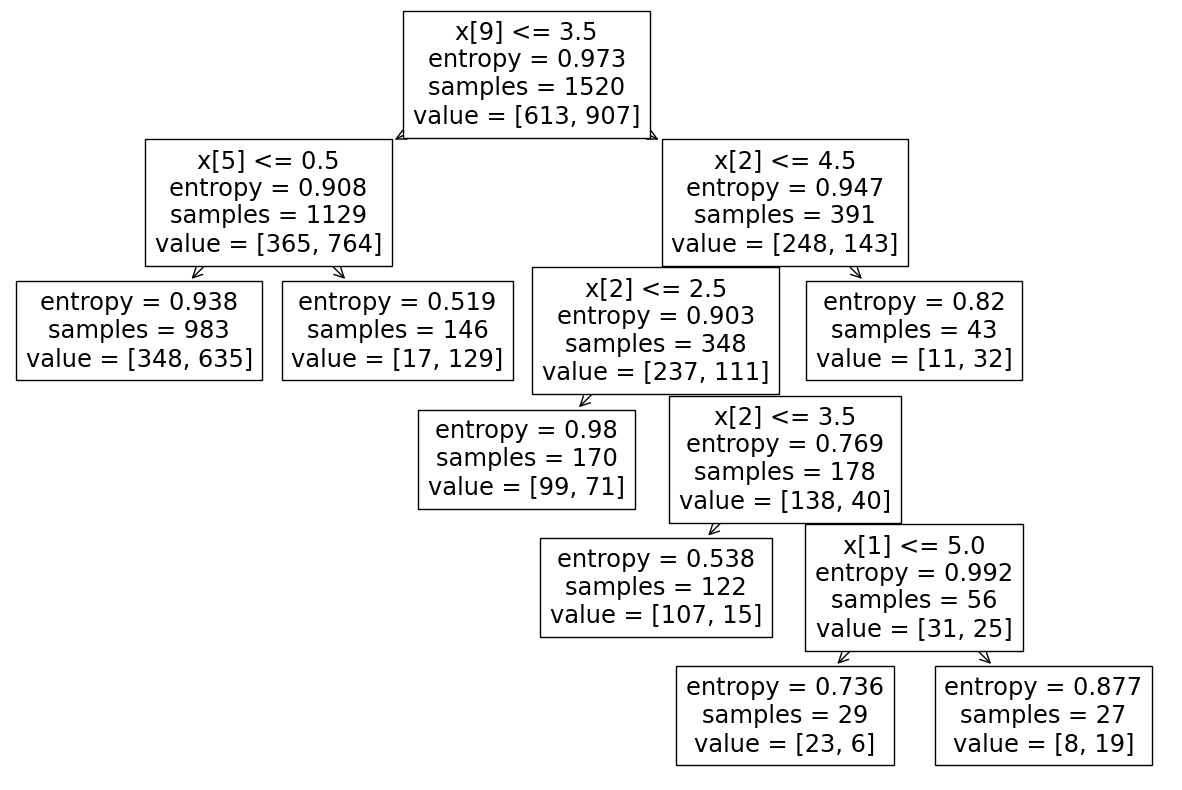

In [838]:
_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_tree);

In [839]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [840]:
y_predict = Dtree_tree.predict(X_test)

In [841]:
accuracy_score(y_test, y_predict)

0.6936127744510978

In [825]:
 X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=6)

## split data into 3 fold


In [826]:
X_train

,a1,a5,a91,J5new,v1,x1,x2,x3,x4,Gen_group
1371,2.0,2.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,4.0
138,2.0,6.0,3.0,1.0,3.0,1.0,0.0,0.0,0.0,4.0
1166,2.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0
1008,2.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0
1107,1.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
1474,1.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0
674,2.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
234,1.0,4.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,3.0
771,2.0,8.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,3.0


In [827]:
y_test

422     0.0
1330    0.0
2045    0.0
1813    1.0
56      1.0
       ... 
1019    0.0
877     1.0
407     0.0
745     0.0
1355    1.0
Name: q1, Length: 380, dtype: float64

In [828]:
from sklearn.model_selection import KFold

In [829]:
kf = KFold(n_splits=4, random_state=6, shuffle=True)

In [830]:
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[   1    3    5 ... 1517 1518 1519]
  Test:  index=[   0    2    4   11   12   14   15   21   22   24   31   33   37   40
   50   55   56   58   59   60   71   73   79   83   85   87   88   92
   93   98  102  105  109  111  117  132  134  136  137  140  148  150
  152  155  165  168  171  178  179  186  187  191  195  208  219  221
  222  223  225  229  231  238  241  243  245  250  256  257  261  263
  264  268  273  277  286  287  290  291  292  302  304  307  313  329
  336  338  343  357  359  363  371  375  379  381  386  399  400  401
  406  408  421  429  430  432  433  436  438  439  444  454  457  459
  463  465  477  478  499  500  502  503  504  508  510  511  512  515
  516  517  519  522  523  524  526  529  531  534  543  544  553  562
  563  568  571  578  584  588  590  592  593  595  596  605  610  613
  616  619  620  626  628  629  636  645  648  649  668  669  670  674
  681  691  694  702  706  710  719  722  723  726  732  733  735  741
  7

### train 4 decision tree models and 1 Naive Bayes

In [831]:
from sklearn.naive_bayes import GaussianNB

In [832]:
results = []
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    result_f = {}
    #DT depth 3, cri gini
    Dtree1 = DecisionTreeClassifier( random_state = 6, criterion='gini' , max_depth = 3) #define
    Dtree1.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    prediction1 = Dtree1.predict(np.array(X_train)[test_index])  #predict
    acc1 = accuracy_score(np.array(y_train)[test_index], prediction1)
    result_f['dt1'] = acc1

    #DT depth 5, cri gini
    Dtree2 = DecisionTreeClassifier( random_state = 6, criterion='gini' , max_depth = 5) #define
    Dtree2.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    prediction2 = Dtree2.predict(np.array(X_train)[test_index])  #predict
    acc2 = accuracy_score(np.array(y_train)[test_index], prediction2) #evaluate
    result_f['dt2'] = acc2

    #DT depth 3, cri gain
    Dtree3 = DecisionTreeClassifier( random_state = 6, criterion='entropy' , max_depth = 3) #define
    Dtree3.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    prediction3 = Dtree3.predict(np.array(X_train)[test_index])  #predict
    acc3 = accuracy_score(np.array(y_train)[test_index], prediction3) #evaluate
    result_f['dt3'] = acc3

    #DT depth 5, cri gain
    Dtree4 = DecisionTreeClassifier( random_state = 6, criterion='entropy' , max_depth = 5) #define
    Dtree4.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    prediction4 = Dtree4.predict(np.array(X_train)[test_index])  #predict
    acc4 = accuracy_score(np.array(y_train)[test_index], prediction4) #evaluate
    result_f['dt4'] = acc4

    #Naive Bayes
    gnb = GaussianNB() #define
    gnb.fit(np.array(X_train)[train_index], np.array(y_train)[train_index]) # train
    predictionN = gnb.predict(np.array(X_train)[test_index])  #predict
    accN = accuracy_score(np.array(y_train)[test_index], predictionN) #evaluate
    result_f['NB'] = accN

    results.append(result_f)

In [833]:
results

[{'dt1': 0.6710526315789473,
  'dt2': 0.6736842105263158,
  'dt3': 0.6710526315789473,
  'dt4': 0.6552631578947369,
  'NB': 0.5078947368421053},
 {'dt1': 0.6894736842105263,
  'dt2': 0.6921052631578948,
  'dt3': 0.6894736842105263,
  'dt4': 0.7,
  'NB': 0.5131578947368421},
 {'dt1': 0.6657894736842105,
  'dt2': 0.6684210526315789,
  'dt3': 0.6657894736842105,
  'dt4': 0.6631578947368421,
  'NB': 0.4868421052631579},
 {'dt1': 0.6894736842105263,
  'dt2': 0.7052631578947368,
  'dt3': 0.6947368421052632,
  'dt4': 0.7026315789473684,
  'NB': 0.5342105263157895}]

## find the best model from 3-fold cross validation

In [834]:
print(f"averaged acc DT1 = { ( results[0]['dt1'] + results[1]['dt1'] + results[2]['dt1'])/3 }")
print(f"averaged acc DT2 = { ( results[0]['dt2'] + results[1]['dt2'] + results[2]['dt2'])/3 }")
print(f"averaged acc DT3 = { ( results[0]['dt3'] + results[1]['dt3'] + results[2]['dt3'])/3 }")
print(f"averaged acc DT4 = { ( results[0]['dt4'] + results[1]['dt4'] + results[2]['dt4'])/3 }")
print(f"averaged acc NB = { ( results[0]['NB'] + results[1]['NB'] + results[2]['NB'])/3 }")

averaged acc DT1 = 0.6754385964912281
averaged acc DT2 = 0.6780701754385965
averaged acc DT3 = 0.6754385964912281
averaged acc DT4 = 0.6728070175438595
averaged acc NB = 0.5026315789473684


## Evaluate on test

In [835]:
gnb = GaussianNB() #define
gnb.fit(np.array(X_train),np.array(y_train))   #train
prediction_test = gnb.predict(np.array(X_test)) #predict
accTest = accuracy_score(np.array(y_test), prediction_test) #evaluate

print(f'model Naïve Bayes จะมี Accuracy เมื่อไปใช้งานจริงประมาณ {accTest}')

model Naïve Bayes จะมี Accuracy เมื่อไปใช้งานจริงประมาณ 0.5131578947368421
